In [2]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a6/08/583e1d8d589e80a702815f58daa317bd469a32c7dc339394e2a0dc14318b/opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Obtaining dependency information for numpy>=1.21.2 from https://files.pythonhosted.org/packages/2f/2a/34fe0b64e78347f4ea128868df0034a97e0f92b476f62947b0976caba820/numpy-1.25.1-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.25.1-cp311-cp311-win_amd64.whl.metadata (5.7 kB)
Using cached opencv_python-4.8.0.74-cp37-abi3-win_amd64.whl (38.1 MB)
Using cached numpy-1.25.1-cp311-cp311-win_amd64.whl (15.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
#main library for object detection
import cv2

In [2]:
#visual library
import matplotlib.pyplot as plt

In [5]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4d/9c/65830d4a56c47f5283eaa244dc1228c5da9c844a9f999ebcc2e69bf6cc65/matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/16/09/989b982322439faa4bafffcd669e6f942b38fee897c2664c987bcd091dec/contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata (5.7 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/f7/3b/3166aa8aaf31353c0a42cb2f22d48d2a423ec77a377c1f5bf1051729552c/fonttools-4.41.0-cp311-cp311-win_amd64.whl.metadata
  Using cached fonttools-4.41.0-cp311-cp311-win_amd64.whl.metadata (152 kB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB

In [3]:
#class of cnn opensourced by google, used to train classifiers
#large coco is a dataset best to train computer vision model
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

#freezing is used to incorporate graph
frozen_model = 'frozen_inference_graph.pb'

In [4]:
#represnet high level api models
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [5]:

#put label file into class label
classLabels = []
file_name = 'labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
classLabels[1]

'bicycle'

In [8]:
#size of new frame
model.setInputSize(320,320)

#scale factor of value for the frame, parameter will be multiplier of frame value
model.setInputScale(1.0/127.5)

#mean value of the actual frame itself
model.setInputMean((127.5,127.5,127.5))

#set the swapRB for every frame
model.setInputSwapRB(True)

< cv2.dnn.Model 00000234D04A58B0>

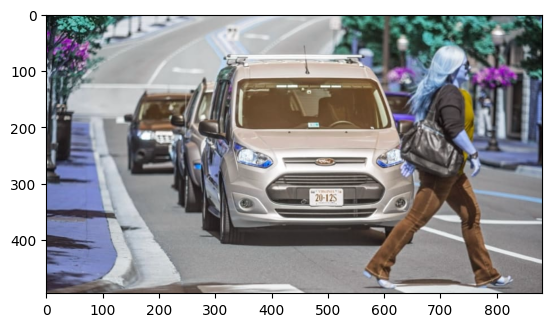

In [9]:
img = cv2.imread('test.jpg')
plt.imshow(img)

In [10]:
#boundarybox for the object, this will confirm the object detected
ClassIndex, confidece, bbox = model.detect(img, confThreshold= 0.5)

In [11]:
#this will print all the objects in respective of the ibject list
print(ClassIndex)

[ 3  3  1 31  1  1  1 27]


In [12]:
#this code determines the font scale, thickness and color of the box and the text on the object
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color =(0,255,0), thickness = 3)

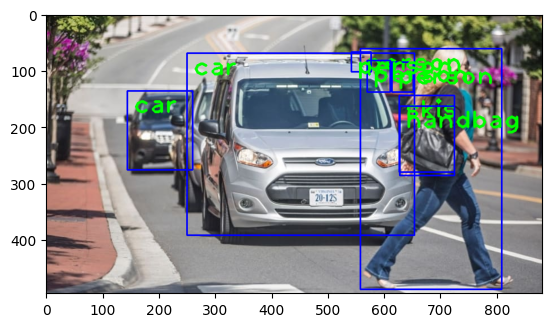

In [13]:
#object detection example - picture
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [16]:
#example for video
cap = cv2.VideoCapture('pexels-george-morina-5688492 (1080p).mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOERROR('Cant open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

#reading of the file
while True:
    ret, frame, = cap.read()

    ClassIndex, confidece, bbox = model.detect(frame, confThreshold= 0.55)

    print(ClassIndex)

    #classifies the boxes and text within the video
    if(len(ClassIndex) !=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, (255,0,0),2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color =(0,255,0), thickness = 3)

    cv2.imshow('Object Detection', frame)

    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[6 6]
[6 6]
[6 6]
[6 6]
[6 6]
[6 6]
[6 6]
[6 6 6]
[6 6 6]
[6 6]
[6 6]
[6 6]
[6 6]
[6]
[6 6]
[6]
[6]
[6]
[6]
[6]
[6]
[6]
[6]
[6]
[6]
[6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6]
[6]
[6 6 6 1]
[6]
[6 6]
[6 6 6 3]
[6 3 6 6]
[6 6 3]
[6 6 6]
[6 6 3]
[6 6]
[6 6]
[6 6]
[6 6]
[6 6]
[6 6]
[6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6]
[6 6]
[6 8 6]
[6 6 8]
[6 8 6]
[6 8]
[6 8]
[6 8 6]
[6 8]
[6 8]
[6 8]
[6 8]
[6 8]
[6 8]
[6]
[6]
[6 8]
[6]
[6 6]
[6]
[6]
[6 6]
[6]
[6]
[6]
[6 8]
[6 8 3]
[6 8 3]
[6 8 3]
[6 8 3]
[6 8]
[6 8]
[6 8]
[6 8]
[8 6]
[8 6]
[8 6 3]
[8 6 3]
[8 3 6]
[8 3 6]
[8 6 3]
[8 6 3]
[6 8 3]
[6 8 3]
[8 6 3]
[6 8 3]
[6 3 8]
[6 3 8]
[6 3 8]
[6 3 8]
[6 8 3]
[6 3 8]
[6 3 1]
[6 3]
[6 3 8 1]
[6 3 8]
[6 3 8]
[3 6 8]
[3 6 8]
[3 6 8]
[6 3]
[6 3 8]
[6 3 8]
[6 3 8]
[6 8 3 3]
[6 3 3 3]
[6 3 8 3 3]
[6 8 3 3 3]
[6 8 3 3 3]
[6 8 3 3]
[6 3 8 3]
[6 3 3]
[6 3]
[6 3 3 8]
[6 3 3 3]
[6 3 3]
[6 3 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6 3]
[6

KeyboardInterrupt: 

In [19]:
#webcam
#example for video
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOERROR('Cant open the video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

#reading of the file
while True:
    ret, frame, = cap.read()

    ClassIndex, confidece, bbox = model.detect(frame, confThreshold= 0.55)

    print(ClassIndex)

    #classifies the boxes and text within the video
    if(len(ClassIndex) !=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, (255,0,0),2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color =(0,255,0), thickness = 3)

    cv2.imshow('Object Detection', frame)

    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[ 1 63 62]
[ 1 63 62]
[ 1 63 62]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[ 1 62]
[1]
[1]
[1]
[ 1 63]
[ 1 63]
[ 1 63]
[1]
[1]
[1]
[1]
[ 1 63]
[ 1 63]
[ 1 63]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[ 1 77]
[1]
[1]
[77  1]
[77  1]
[ 1 77]
[ 1 77  1]
[77  1  1]
[77  1]
[77  1]
[77  1]
[77  1]
[ 1 77 32]
[ 1 32]
[32  1 77]
[1]
[ 1 77]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1]
[77  1 75]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1 1]
[1 1]
[1]
[ 1 22]
[1 1]
[22]
[1]
[1]
[63  1]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]

KeyboardInterrupt: 